In [1]:
indices = [[  0, 52, 62, 80, 106, 117, 137, 142, 156, 159, 166, 185, 215, 226, 235, 242, 252, 259, 279, 281, 292, 296, 299, 
                303, 308, 315, 318, 321, 329, 333, 335, 354, 360, 374, 377, 382, 386, 390, 393, 402, 414, 420, 444, 447, 
                465, 469, 487, 491, 504, 506, 510, 513, 525, 528, 538, 552, 558, 570, 576, 581, 584, 588, 595, 598, 604, 
                607, 610, 618, 619, 622, 631, 641, 645, 662, 672, 685, 693, 697, 704, 718, 724, 726, 735, 739, 745, 754, 
                755, 770, 773, 789, 790, 799, 805, 809, 823, 834, 850, 854, 857, 868, 874, 875, 877, 883, 885, 904, 906, 
                911, 919, 923, 926, 932, 943, 962, 965, 984, 991, 999, 1007, 1010, 1015, 1017, 1018],
           [   0, 31, 45, 47, 56, 63, 69, 85, 88, 92, 96, 112, 118, 124, 130, 137, 143, 151, 158, 170, 184, 202, 223, 243, 249,
             255,260,269,272,275,276,282,285,295,296,297,306,308,318,322,331,334,337,338,341,343,354,357,381,387,400,402,408,
             420,423,426,429,441,443,445,448,454,463,465,474,481,502,506,524,533,538,548,556,562,566,570,581,588,603,604,609,
             652,668,681,698,710,714,725,729,736,739,743,748,749,752,766,770,774,778,781,792,795,803,804,806,814,818,821,828,
             834,837,843,849,855,862,868,874,884,888,895,896,919,935,942,945,957,958,963,964,965,977,980,984,989,997,1000],
           [   0,37,53,81,94,99,119,123,124,142,144,146,162,193,211,213,222,230,232,235,238,240,252,255,258,267,270,275,
                278,284,287,289,300,307,313,331,352,359,371,379,386,389,392,409,412,432,435,440,442,446,462,467,472,
                506,527,531,535,553,557,561,571,579,589,602,607,609,612,616,621,631,634,638,640,644,645,661,669,673,676,
                692,695,698,701,711,717,720,721,734,744,747,750,755,759,774,785,793,807,859,891,895,912,927,948,958,969,
                980,997,998,1004],
           [   0,33,58,75,86,100,118,120,139,142,147,159,162,165,167,174,179,180,183,192,197,199,209,214,217,222,227,231,
                232,239,244,251,262,266,271,275,277,282,287,291,294,297,308,311,316,318,322,327,339,342,348,352,362,372,
                383,397,399,402,405,417,420, 425,428,454,457,464,470,477,481,485,488,494,495,503,507,517,535,537,540,553,
                556,558,577,588,598,601,609,620,634,638,647,650,656,659,660,663,669,672,681,684,696,702,705,708,716,719,726,
                730,739,743,746,758,765,766,777,783,785,786,790,792,800,802,808,809,810,816,819,823,827,835,837,842,845,853,
                865,868,873,885,889,891,897,904,906,918,941,949,956,961,969,973,976,981,984,991,996,999,1002],
           [   0,59,68,73,76,86,94,97,101,104,109,118,120,123,128,134,136,139,143,145,148,154,160,162,177,190,195,199,204,
                208,212,220,221,222,232,234,246,251,253,256,263,270,273,287,302,314,322,355,357,368,396,397,401,416,428,433,
                437,442,446,452,456,469,475,490,500,506,525,526,538,545,551,554,558,562,571,579,582,586,587,600,612,664,823,
                824,832,850,858,870,879,881,889,898,901,913,916,924,932,936,943,952,955,975,985,992,997,1001],
           [   0,36,56,94,114,121,136,140,143,153,159,162,171,174,182,190,197,201,215,219,237,239,249,251,254,265,269,297,322,
                335,340,343,348,352,355,363,368,371,375,384,388,395,405,411,439,461,464,468,477,483,485,487,494,497,501,503,
                514,519,521,526,529,532,538,547,551,555,560,579,584,597,600,602,607,609,617,623,626,634,638,644,649,652,663,
                671,672,675,678,685,688,699,700,712,719,724,726,735,744,753,756,775,797,806,812,818,826,829,832,848,852,856,
                866,869,872,875,881,886,891,893,895,901,910,930,936,940,953,958,989,997,1004,1006] 
          ]

In [2]:
import numpy as np
import torch
import torch.nn as nn
import csv
import os
import cv2
from PIL import Image
from enduro_lstm import *
import matplotlib.pyplot as plt
import time

In [3]:
use_gpu = input("Use GPU (y/n) ")

if use_gpu == 'y':
    use_gpu = True
else:
    use_gpu = False
    
device = conf_cuda(use_gpu)

Use GPU (y/n) y
GPU is available


In [4]:
obs = input('escreva uma observacao (sem espaco): ')

if obs == 'zigzag':
    zigzag = True
else:
    zigzag = False

escreva uma observacao (sem espaco): ryo_lstm_sigmoide


In [5]:
data_path = r"../1-generate/data/"
n_epochs = int(input("number of epochs: ") ) #5000
hidden_neurons = int(input("number of hidden neurons: ")) #500
stop_train = 1e-5

# start_match = int(input("start match: ")) #45
# end_match = int(input("end match: ")) #49

start_match = 45
end_match = 50

# start_frame = int(input("start frame: ")) #1
# end_frame = int(input("end frame: ")) #1000

start_frame = 1
end_frame = 1020

is_softmax = False

number of epochs: 10000
number of hidden neurons: 500


In [6]:
model_name = f"{obs}_m{start_match}to{end_match}_f{start_frame}to{end_frame}_epoch{n_epochs}_H{hidden_neurons}"
newpath = f"models/" + model_name
if not os.path.exists(newpath):
    print(f"models/" + model_name + " created")
    os.makedirs(newpath)
else:
    print(f"models/" + model_name)
    print("ATTENTION! folder not created. Training informations will overwrite the existing one")


models/ryo_lstm_sigmoide_m45to45_f1to1020_epoch10000_H500
ATTENTION! folder not created. Training informations will overwrite the existing one


In [7]:
ACTIONS_LIST = get_actions_list(zigzag=zigzag)

In [8]:
num_of_frames_arr = []
frames_arr = []
actions_arr = []

for m in range(start_match, end_match + 1):
    
    num_of_frames, frames, actions, rewards, lifes = load_npz(data_path, m)
    frames = frames[start_frame - 1:end_frame]
    frames = frames.reshape(end_frame - start_frame + 1, 170, 120)
    frames = frames[:, 30:130, :]
    frames = frames.reshape(end_frame - start_frame + 1, 12000)
    actions = actions[start_frame - 1:end_frame]
    
    action_one_hot = [prepare_action_data(i, ACTIONS_LIST) for i in actions]
    actions = np.array(action_one_hot)
    actions = actions.reshape(len(actions), -1)
    
    frames_arr.append(frames)
    actions_arr.append(actions)
    num_of_frames_arr.append(end_frame - start_frame + 1) 

Successfully loaded NPZ.


In [9]:
data_chunked = []
target_chunked = []
for i in range(len(frames_arr)):
    for j in range(len(indices[i]) - 1):
        data_chunked.append(frames_arr[i][indices[i][j]:indices[i][j+1]])
        target_chunked.append(actions_arr[i][indices[i][j]:indices[i][j+1]])

In [10]:
X_train = np.array(data_chunked)/255
Y_train = np.array(target_chunked)
num_of_frames_arr = np.array(num_of_frames_arr)

C:\Users\alece\miniconda3\envs\torch\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.
C:\Users\alece\miniconda3\envs\torch\lib\site-packages\ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [11]:
X_train_filtrado = []
Y_train_filtrado = []
for i in range(len(X_train)):
    if len(X_train[i]) > 100:
        pass
    else:
        X_train_filtrado.append(X_train[i])
        Y_train_filtrado.append(Y_train[i])
X_train = X_train_filtrado
Y_train = Y_train_filtrado

teste com zigzag

In [11]:
X_train = np.array(frames_arr)/255

In [12]:
Y_train = actions_arr

voltando

In [12]:
X_train = list(map(lambda x: torch.tensor(x), X_train))
Y_train = list(map(lambda x: torch.tensor(x), Y_train))

In [13]:
seq_len = torch.FloatTensor(list(map(len,X_train)))
seq_len

tensor([52., 10., 18., 26., 11., 20.,  5., 14.,  3.,  7., 19., 30., 11.,  9.,
         7., 10.,  7., 20.,  2., 11.,  4.,  3.,  4.,  5.,  7.,  3.,  3.,  8.,
         4.,  2., 19.,  6., 14.,  3.,  5.,  4.,  4.,  3.,  9., 12.,  6., 24.,
         3., 18.,  4., 18.,  4., 13.,  2.,  4.,  3., 12.,  3., 10., 14.,  6.,
        12.,  6.,  5.,  3.,  4.,  7.,  3.,  6.,  3.,  3.,  8.,  1.,  3.,  9.,
        10.,  4., 17., 10., 13.,  8.,  4.,  7., 14.,  6.,  2.,  9.,  4.,  6.,
         9.,  1., 15.,  3., 16.,  1.,  9.,  6.,  4., 14., 11., 16.,  4.,  3.,
        11.,  6.,  1.,  2.,  6.,  2., 19.,  2.,  5.,  8.,  4.,  3.,  6., 11.,
        19.,  3., 19.,  7.,  8.,  8.,  3.,  5.,  2.,  1.])

In [14]:
X_train = pad_sequence(X_train, batch_first=True).float()
Y_train = pad_sequence(Y_train, batch_first=True).float()

In [15]:
X_train = pack_padded_sequence(X_train, seq_len, batch_first=True, enforce_sorted=False)

In [16]:
class Model(nn.Module):
    def __init__(self, device, input_size, output_size, hidden_dim, n_layers, is_softmax):
        super(Model, self).__init__()
        
        self.device = device

        # Defining some parameters
        self.input_size = input_size
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        # self.h0 = torch.zeros(self.n_layers, 1, self.hidden_dim).to(self.device)
        # self.c0 = torch.zeros(self.n_layers, 1, self.hidden_dim).to(self.device)

        self.init_hidden()

        #Defining the layers
        # RNN Layer
        self.lstm = nn.LSTM(input_size, hidden_dim, n_layers, batch_first=True)  
        
        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_size)
        
        if is_softmax:
            self.out = nn.Softmax()
        else:
            self.out = nn.Sigmoid()
    
    def forward(self, x):
        
        # batch_size = x.size(0)
        batch_size = 1

        # Initializing hidden state for first input using method defined below
        # hidden = self.init_hidden(batch_size)
        # self.h0 = torch.zeros(self.n_layers, batch_size, self.hidden_dim).to(self.device)
        # self.c0 = torch.zeros(self.n_layers, batch_size, self.hidden_dim).to(self.device)

        hidden = self.init_hidden()

        # Passing in the input and hidden state into the model and obtaining outputs
        # out, hidden = self.lstm(x)
        
        pad_embed_pack_lstm = self.lstm(x, hidden)
        pad_embed_pack_lstm_pad = pad_packed_sequence(pad_embed_pack_lstm[0], batch_first=True)
        
        outs, lens = pad_embed_pack_lstm_pad
        
        # Reshaping the outputs such that it can be fit into the fully connected layer
        out = outs.contiguous().view(-1, self.hidden_dim)
        out = self.fc(out)
        
        out = self.out(out)
        
        return out
        
    def init_hidden(self):
        # the weights are of the form (nb_layers, batch_size, nb_lstm_units)
        hidden_a = torch.randn(1, self.input_size, self.hidden_dim)
        hidden_b = torch.randn(1, self.input_size, self.hidden_dim)

        if self.device.type == 'cuda':
            hidden_a = hidden_a.cuda()
            hidden_b = hidden_b.cuda()

        hidden_a = Variable(hidden_a)
        hidden_b = Variable(hidden_b)

        return (hidden_a, hidden_b)

In [17]:
model = Model(device=device, input_size=12000, output_size=len(ACTIONS_LIST), hidden_dim=hidden_neurons, n_layers=1, is_softmax=is_softmax)

In [18]:
# We'll also set the model to the device that we defined earlier (default is CPU)
if use_gpu:
    model.cuda()
    X_train = X_train.cuda() 
    Y_train = Y_train.cuda()

In [19]:
min_loss = 1e-05
# Define Loss, Optimizer
criterion = nn.MSELoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=lr)
optimizer = torch.optim.Adam(model.parameters())

In [20]:
train_loss_arr = np.array([])
train_acc_arr = np.array([])

In [21]:
start_time_processing = time.time()

# Training Run
loss_file = open(newpath + '/' + "loss_file.txt", "w")
first_time = True

best_loss = 1
first_epoch = True

for epoch in range(1, n_epochs + 1):

    model.train()

    optimizer.zero_grad() # Clears existing gradients from previous epoch
    X_train.to(device)
    output = model(X_train)
    loss = criterion(output, Y_train.view(-1,len(ACTIONS_LIST)).float())
    loss.backward() # Does backpropagation and calculates gradients
    optimizer.step() # Updates the weights accordinglyw
        
    if epoch%10 == 0:

        train_loss_arr = np.append(train_loss_arr, loss.item())
        train_acc_arr  = np.append(train_acc_arr, get_acc(output, Y_train.reshape(-1, len(ACTIONS_LIST))))
        # train_acc_arr  = np.append(train_acc_arr, get_acc_2(output, target_padded.reshape(-1, len(ACTIONS_LIST))))
        
        loss_file.write("Epoch: {}/{}-------------------------------------------\n".format(epoch, n_epochs))
        loss_file.write("Train -> Loss: {:.15f} Acc: {:.15f}\n".format(train_loss_arr[-1], train_acc_arr[-1]))
            
        print("Epoch: {}/{}-------------------------------------------".format(epoch, n_epochs))
        print("Train -> Loss: {:.15f} Acc: {:.15f}".format(train_loss_arr[-1], train_acc_arr[-1]))
        
        if train_loss_arr[-1] < best_loss:
            state = { 'epoch': epoch + 1, 'state_dict': model.state_dict(),
                      'optimizer': optimizer.state_dict(), 'losslogger': loss.item(), }
            torch.save(state, newpath + '/' + model_name)
            best_loss = loss.item()
        else:
            print("model not saved")
            
loss_file.write("--- %s seconds ---" % (time.time() - start_time_processing))
loss_file.close()
np.savez(newpath + '/' + "train_loss_arr", train_loss_arr)
#np.savez(newpath + '/' + "valid_acc_table", valid_loss_mean_arr)
print("--- %s seconds ---" % (time.time() - start_time_processing))

RuntimeError: CUDA out of memory. Tried to allocate 92.00 MiB (GPU 0; 2.00 GiB total capacity; 429.91 MiB already allocated; 45.06 MiB free; 598.00 MiB reserved in total by PyTorch)

FileNotFoundError: [Errno 2] No such file or directory: 'models/novo_teste_m35to35_f1to120_epoch1000_H200/train_loss.png'

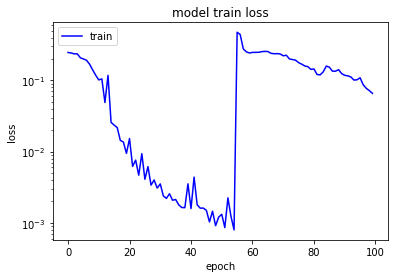

In [56]:
import matplotlib.pyplot as plt

# summarize history for loss
plt.clf()
plt.plot(train_loss_arr, color='blue')
plt.title('model train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.yscale('log')
plt.savefig(newpath + '/' + 'train_loss.png')